## Difference between Regression and Interpolation

Regressions are motivated by a physical model. On the other hand, interpolation methods do not care about any underlying physics, they just connect points with functions.

* When do we use interpolation? When we have incomplete data series (e.g. a temperature data series that has missing points because of e.g. instrument issues like a broken thermometer or so).

* Two types of interpolation exist: 1) Global (single-function) interpolation, in which all data points are connected by a single function, and 2) Point-to-point interpolation where every pair of data points is connected with individual functions.

* In most situations in physics, we are more likely to use point-to-point interpolation, but it is useful to know how the methods in both cases work.

# Global interpolation

## Newton interpolation
https://pythonnumericalmethods.berkeley.edu/notebooks/chapter17.05-Newtons-Polynomial-Interpolation.html

In [19]:
# Importing libraries

import numpy as np
import matplotlib.pyplot as plt
# Importing the scipy interpolators

import scipy.interpolate as interp

In [2]:
x = [0, 1, 2]
y = [1, 3, 2]

In [9]:
f = lagrange(x,y)
x_new = np.arange(-1,3.5,0.01)
print(f)

      2
-1.5 x + 3.5 x + 1


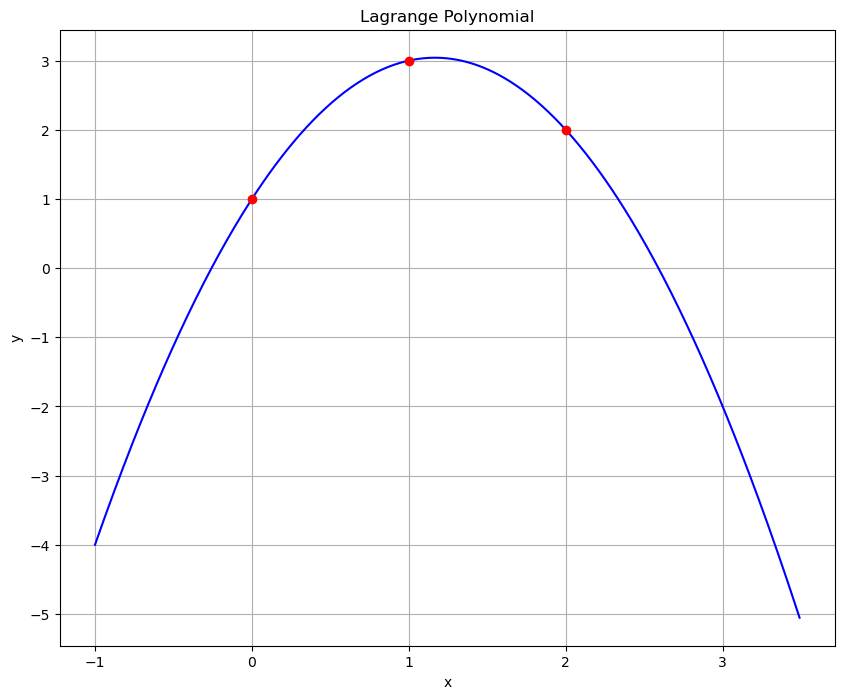

In [10]:
fig = plt.figure(figsize = (10,8))
plt.plot(x_new, f(x_new), 'b', x, y, 'ro')
plt.title('Lagrange Polynomial')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Spline interpolation
Splines are a set of basis vectors, we can select the basis vectors to be linear functions, quadratic functions, etc. 
* For smoothness at the points, we can set two splines to have the same derivative.
* The knots are the turning points/pivots for the splines.

## Example

In [11]:
import pandas as pd

In [14]:
# Import the data:

data_temp = pd.read_csv("/home/prostofsound/jnotebooks/computational-physics-1/Notes/data/temperature_data.csv")

#print(data_temp)

# Place data into arrays

month = np.array(data_temp["Month"])
temp  = np.array(data_temp["Mean_temperature(C)"])

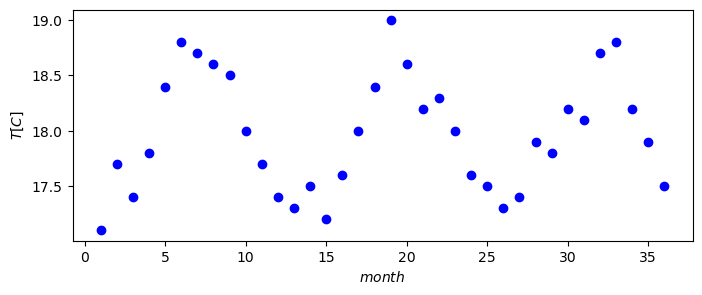

In [16]:
# Plotting

plt.figure(figsize=(8,3))

plt.plot(month, temp, linestyle = " ", marker = "o", color = "blue")
#plt.plot(month, temp, linestyle = "--", marker = "o", alpha = 0.2, color = "blue")

plt.xlabel(r"$month$")
plt.ylabel(r"$T[C]$")

plt.show()

In [17]:
print(len(month))

36


In [21]:
# Interpolation functions

f_1 = interp.interp1d(month, temp, kind = "linear")
f_2 = interp.interp1d(month, temp, kind = "quadratic")

f_3 = interp.interp1d(month, temp, kind = "nearest") #use the nearest data point as a reference, widely use in fluid dynamics
f_4 = interp.interp1d(month, temp, kind = "previous") #use the previous data point as a reference
f_5 = interp.interp1d(month, temp, kind = "next") #use the next data point as a reference

#print(f_1)

In [22]:
# Evaluate the above into an axis:

month_new = np.arange(1., 36.25, 0.25)

#print(month_new)

temp_1 = f_1(month_new)
temp_2 = f_2(month_new)
temp_3 = f_3(month_new)
temp_4 = f_4(month_new)
temp_5 = f_5(month_new)

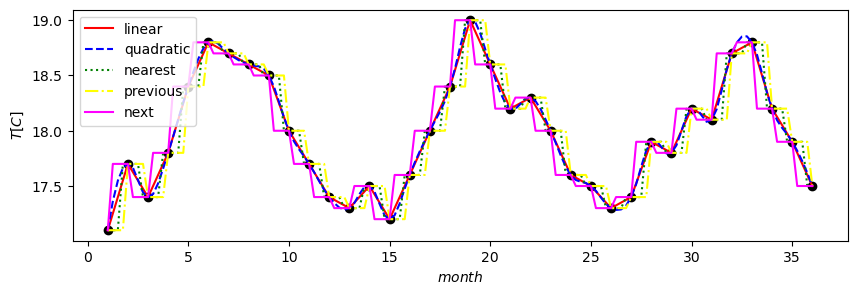

In [24]:
# Plotting

plt.figure(figsize=(10,3))

plt.plot(month, temp, linestyle = " ", marker = "o", color = "black")
plt.plot(month_new, temp_1, linestyle = "-", label = "linear", 
        color = "red")
plt.plot(month_new, temp_2, linestyle = "--", label = "quadratic",\
        color = "blue")
plt.plot(month_new, temp_3, linestyle = ":", label = "nearest",\
        color = "green") #it's boxy

plt.plot(month_new, temp_4, linestyle = "-.", label = "previous",\
        color = "yellow") #it's boxy
plt.plot(month_new, temp_5, linestyle = "-", label = "next",\
        color = "magenta") #it's boxy

plt.xlabel(r"$month$")
plt.ylabel(r"$T[C]$")

plt.legend()

plt.show()

## Spline interpolation
Broadly used for scalars data points.

In [25]:
# Get the tck object:

tck = interp.splrep(month, temp, s=0, k=3)

# Evalue the coefficients to get the Splines:

temp_spline = interp.splev(month_new, tck, der=0)

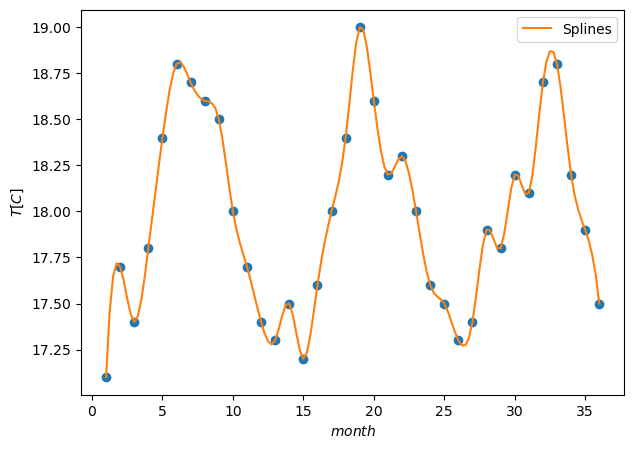

In [26]:
# Plotting

plt.figure(figsize=(7,5))

plt.plot(month, temp, linestyle = " ", marker = "o")

plt.plot(month_new, temp_spline, linestyle = "-", label="Splines")

plt.xlabel(r"$month$")
plt.ylabel(r"$T[C]$")

plt.legend()

plt.show()

## Example 2: Nans
First we have to remove the nans to use the interpolation functions we have reviewed.

In [27]:
# Import the data:

data_missing = pd.read_csv("/home/prostofsound/jnotebooks/computational-physics-1/Notes/data/temperature_data_missing.csv")

#print(data_missing)

# Place data into arrays

month_missing = np.array(data_missing["Month"])
temp_missing  = np.array(data_missing["Mean_temperature(C)"])

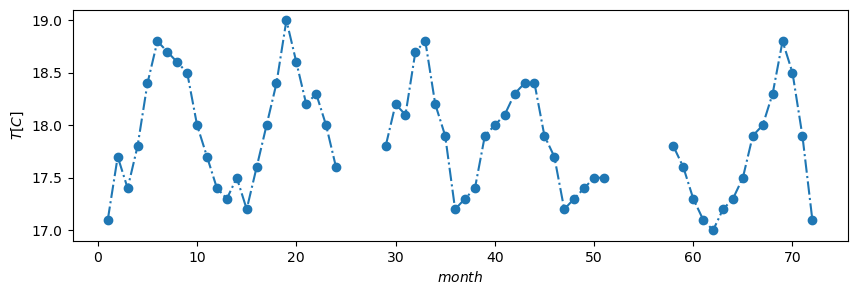

In [29]:
# Plotting

plt.figure(figsize=(10,3))

plt.plot(month_missing, temp_missing, linestyle = "-.", marker = "o")

plt.xlabel(r"$month$")
plt.ylabel(r"$T[C]$")

plt.show()

Let's try interp1D

In [30]:
# New axis:
month_new1 = np.arange(1, 72.25, 0.25)

In [31]:
# Interpolator:

f_interp_missing = interp.interp1d(month_missing, temp_missing, \
                                  kind = "cubic")

# Evaluate:

temp_missing1 = f_interp_missing(month_new1)

print(temp_missing1)

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

## Basic analysis with NANs

In [33]:
# Mean values

mean_temp = np.mean(temp_missing)
print(mean_temp)

mean_temp = np.nanmean(temp_missing) #rules the nans out
print(mean_temp)


# Std. Dev. values

std_temp = np.std(temp_missing)
print(std_temp)

std_temp = np.nanstd(temp_missing) #rules the nans out
print(std_temp)

nan
17.875806451612902
nan
0.5238460386568187


## NAN cleanup

In [34]:
print(temp_missing)

[17.1 17.7 17.4 17.8 18.4 18.8 18.7 18.6 18.5 18.  17.7 17.4 17.3 17.5
 17.2 17.6 18.  18.4 19.  18.6 18.2 18.3 18.  17.6  nan  nan  nan  nan
 17.8 18.2 18.1 18.7 18.8 18.2 17.9 17.2 17.3 17.4 17.9 18.  18.1 18.3
 18.4 18.4 17.9 17.7 17.2 17.3 17.4 17.5 17.5  nan  nan  nan  nan  nan
  nan 17.8 17.6 17.3 17.1 17.  17.2 17.3 17.5 17.9 18.  18.3 18.8 18.5
 17.9 17.1]


In [36]:
# Get the indices for all the finite values

idx_finite = np.isfinite(temp_missing) #check the numbers

print(idx_finite)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
 False False False False  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True False False False False False False  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True]


In [37]:
print(month_missing.shape, temp_missing.shape)

(72,) (72,)


In [39]:
# Get the clean vectors

month_cleaned = month_missing[idx_finite] #use the booleans as indexes, the False statetements are removed
temp_cleaned  = temp_missing[idx_finite]

print(month_cleaned.shape, temp_cleaned.shape)

(62,) (62,)


In [41]:
print(np.unique(temp_missing))
print(np.unique(temp_cleaned)) #the nans are gone

[17.  17.1 17.2 17.3 17.4 17.5 17.6 17.7 17.8 17.9 18.  18.1 18.2 18.3
 18.4 18.5 18.6 18.7 18.8 19.   nan]
[17.  17.1 17.2 17.3 17.4 17.5 17.6 17.7 17.8 17.9 18.  18.1 18.2 18.3
 18.4 18.5 18.6 18.7 18.8 19. ]


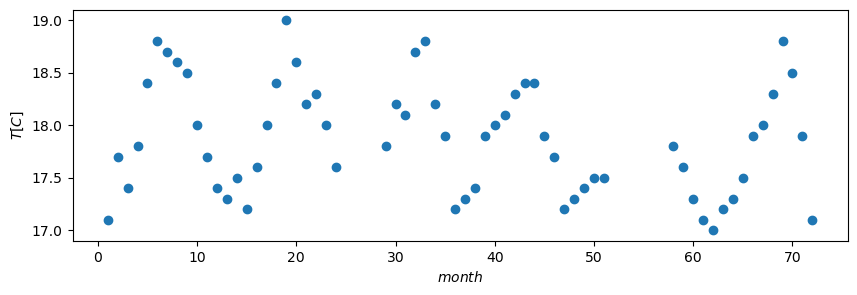

In [42]:
# Plotting

plt.figure(figsize=(10,3))

plt.plot(month_cleaned, temp_cleaned , linestyle = " ", marker = "o")

plt.xlabel(r"$month$")
plt.ylabel(r"$T[C]$")

plt.show()

What about outliers?

Now, we can use the interpolators.

In [44]:
# Interpolator:

f_interp_cleaned = interp.interp1d(month_cleaned, temp_cleaned, \
                                  kind = "cubic")

f_interp_cleaned2 = interp.interp1d(month_cleaned, temp_cleaned, \
                                  kind = "linear")

# Evaluate:

temp_cleaned1 = f_interp_cleaned(month_new1)
temp_cleaned2 = f_interp_cleaned2(month_new1)

#print(temp_cleaned1)

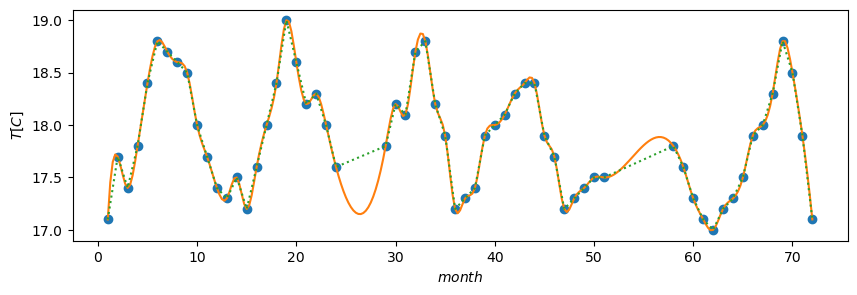

In [45]:
# Plotting

plt.figure(figsize=(10,3))

plt.plot(month_cleaned, temp_cleaned , linestyle = " ", marker = "o")
plt.plot(month_new1, temp_cleaned1, linestyle = "-")
plt.plot(month_new1, temp_cleaned2, linestyle = ":")


plt.xlabel(r"$month$")
plt.ylabel(r"$T[C]$")

plt.show()